# Cautions: Animal bite and rabies 
# A talk to non_technical

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline  
sns.set_context('talk')
from IPython.display import Image


## Introduction
In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

In [2]:
Image(url = "https://elite24er.com/wp-content/uploads/2020/11/Protecting-Yourself-From-Animal-Bites-1024x536.jpg", width = 600)
# print(img)

## Goal of the study
* Which type of animal or breed bite most?
* Which zip code had a high chance of being bitten?
* Which bite causes highest rabies positive rate?


Import data

In [3]:
file = 'archive.zip'
df = pd.read_csv(file, parse_dates = [0,6,10, 12,13])
df['bite_date'] = df['bite_date'].str.replace('5013','2013') 
df['bite_date'] = pd.to_datetime(df['bite_date'], infer_datetime_format=True)
wrong_items = ['2101-02-18','2020-08-08','2201-02-21','2201-02-21','2201-05-01','2021-04-22','1952-05-28','1952-08-05']
corrected = ['2011-02-18','2012-08-08','2015-02-21','2015-02-21','2015-05-01','2012-04-22','2013-05-28','2015-08-05']
df.replace({'bite_date':dict(zip(wrong_items,corrected))}, inplace = True)
idx = df.loc[df['bite_date'].dt.year > 2018].index
df.drop(idx, inplace = True)
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20,40229,NO,BODY,1985-05-05,UNKNOWN,NaT,NaT,UNKNOWN
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaT,40218,NO,BODY,1986-02-12,UNKNOWN,NaT,NaT,UNKNOWN
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaT,40219,NO,BODY,1990-05-07,UNKNOWN,NaT,NaT,UNKNOWN
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaT,NaN,NO,BODY,1990-10-02,UNKNOWN,NaT,NaT,UNKNOWN
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaT,NaN,NO,BODY,NaT,UNKNOWN,NaT,NaT,UNKNOWN


In [4]:
df.isnull().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5243
GenderIDDesc         2526
color                2577
vaccination_yrs      5264
vaccination_date     4887
victim_zip           1837
AdvIssuedYNDesc      6437
WhereBittenIDDesc     616
quarantine_date      6982
DispositionIDDesc    7467
head_sent_date       8607
release_date         7557
ResultsIDDesc        7459
dtype: int64

Check data out of time bound from 1985 to 2017.
`bite_data` is cleaned

In [5]:
idx = df.loc[(df['bite_date'].dt.year < 1985) & (df['bite_date'].dt.year > 2017)].index
idx_bf = idx - 1
idx_aft = idx + 1
idx = idx.union(idx_bf).union(idx_aft)
print(df.iloc[idx])


Empty DataFrame
Columns: [bite_date, SpeciesIDDesc, BreedIDDesc, GenderIDDesc, color, vaccination_yrs, vaccination_date, victim_zip, AdvIssuedYNDesc, WhereBittenIDDesc, quarantine_date, DispositionIDDesc, head_sent_date, release_date, ResultsIDDesc]
Index: []


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9002 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8685 non-null   datetime64[ns]
 1   SpeciesIDDesc      8884 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6476 non-null   object        
 4   color              6425 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   datetime64[ns]
 7   victim_zip         7165 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8386 non-null   object        
 10  quarantine_date    2020 non-null   datetime64[ns]
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    datetime64[ns]
 13  release_date       1445 non-null   datetime64[ns]
 14  ResultsI

Columns instructions:
* `bite_date`: The date the bite occurred
* `SpeciesIDDesc`: The species of animal that did the biting
* `BreedIDDesc`: Breed (if known)
* `GenderIDDesc`: Gender (of the animal)
* `color`: color of the animal
* `vaccination_yrs`: how many years had passed since the last vaccination
* `vaccination_date`: the date of the last vaccination
* `victim_zip`: the zipcode of the victim
* `AdvIssuedYNDesc`: whether advice was issued
* `WhereBittenIDDesc`: Where on the body the victim was bitten
* `quarantine_date`: whether the animal was quarantined
* `DispositionIDDesc`: whether the animal was released from quarantine
* `headsentdate`: the date the animal’s head was sent to the lab
* `release_date`: the date the animal was released
* `ResultsIDDesc`: results from lab tests (for rabies)

In [7]:
df.nunique()

bite_date            2694
SpeciesIDDesc           9
BreedIDDesc           101
GenderIDDesc            3
color                 712
vaccination_yrs         4
vaccination_date     2107
victim_zip            233
AdvIssuedYNDesc         2
WhereBittenIDDesc       3
quarantine_date       602
DispositionIDDesc       4
head_sent_date        325
release_date          582
ResultsIDDesc           3
dtype: int64

## Zip codes have the most victims

In [8]:
# A Bar plot showing the proportion of animal type in zip code
zip_species_df = df.copy()
zip_species_df['SpeciesIDDesc'].replace(['RACCOON','HORSE','FERRET', 'RABBIT','SKUNK'],'OTHER', inplace = True)
zip_species_long_df = zip_species_df.pivot_table(values='bite_date', index='victim_zip', columns='SpeciesIDDesc',aggfunc='count')
zip_species_long_df['SUM'] = zip_species_long_df.sum(axis = 1)
zip_species_long_df = zip_species_long_df.sort_values(by = 'SUM', ascending = False)

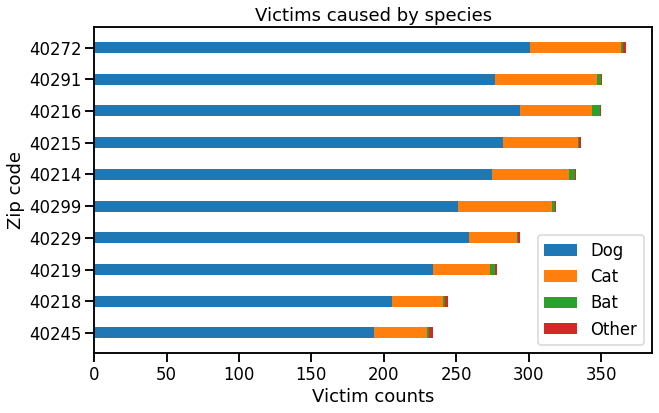

In [9]:
labels = zip_species_long_df.head(10).index
DOG = zip_species_long_df['DOG'].head(10)
CAT = zip_species_long_df['CAT'].head(10)
BAT = zip_species_long_df['BAT'].head(10)
OTHER = zip_species_long_df['OTHER'].head(10)
height = 0.35  
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(labels, DOG, height, label='Dog')
ax.barh(labels, CAT, height, left=DOG,label='Cat')
ax.barh(labels, BAT, height, left=DOG + CAT,label='Bat')
ax.barh(labels, OTHER, height, left=DOG + CAT+BAT,label='Other')
ax.set_ylabel('Zip code')
ax.set_xlabel('Victim counts')
ax.set_title('Victims caused by species');
plt.gca().invert_yaxis()
ax.legend();

## Zip code on map

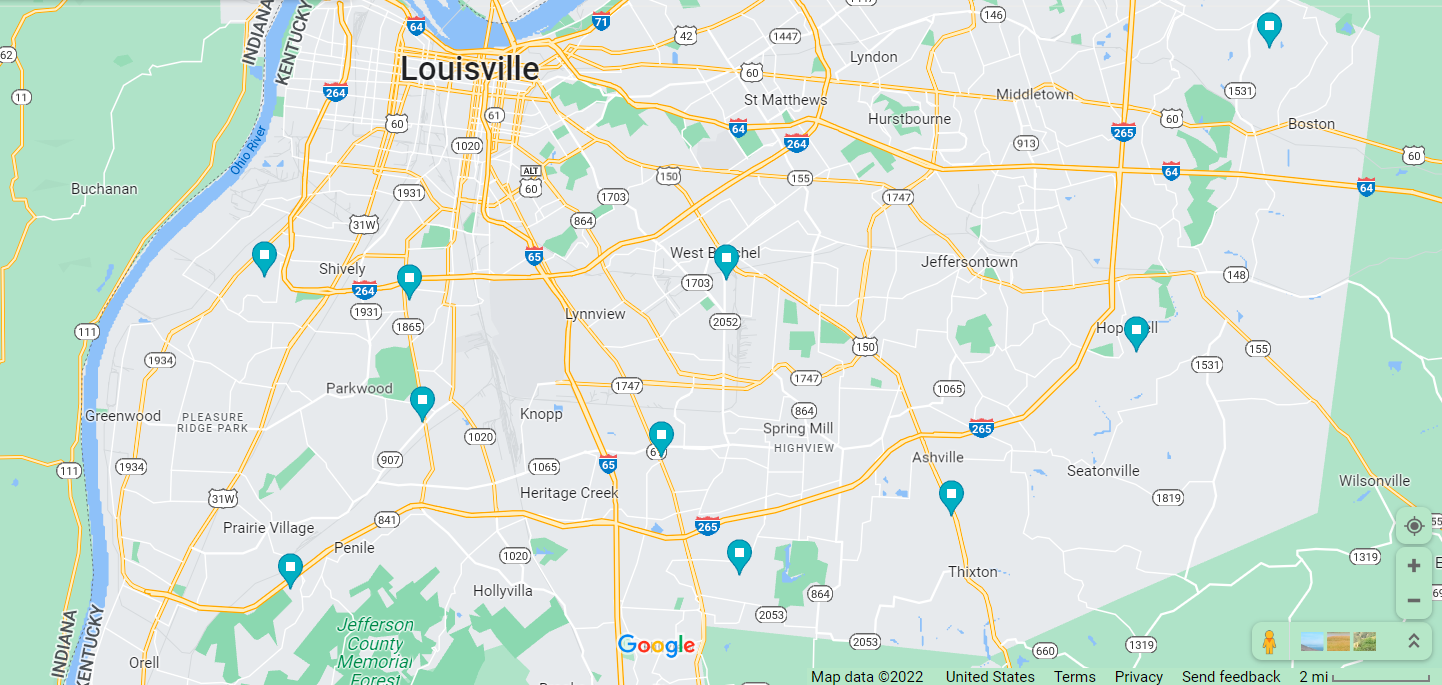

In [10]:
Image('Top10_ZipbyvictimsMap.png')

* The top 10 Zip codes by victim numbers are located relatively far from the downtown, and close to water body (e.g., the Ohio River) or forest.

## Zip code have the most victms have the highest probability of unvaccined animal bite

C:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


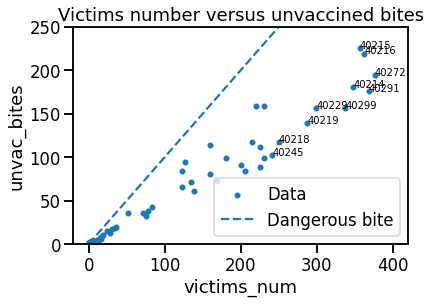

In [12]:
unknown_vac_zip_df = pd.DataFrame(df[df['vaccination_yrs'].isna() & df['vaccination_date'].isna()].dropna(axis = 1, how = 'all')['victim_zip'].value_counts())
unknown_vac_zip_df.rename(columns = {'victim_zip':'unvac_bites'}, inplace = True)
victim_zip_df = pd.DataFrame(df['victim_zip'].value_counts())
victim_zip_df.rename(columns = {'victim_zip':'victims_num'}, inplace = True)
temp = victim_zip_df.merge(unknown_vac_zip_df, how = 'left', left_index = True, right_index = True)
temp.plot(x = 'victims_num', y = 'unvac_bites',kind = 'scatter', label = 'Data')
plt.plot([0,400],[0,400],'--',label ='Dangerous bite')
for label, row1, row2 in zip(labels, temp.loc[labels,'victims_num'], temp.loc[labels,'unvac_bites']):
    plt.annotate(label, (row1, row2), fontsize=10)
plt.ylim((0,250))
plt.legend(loc = 4)
plt.title('Victims number versus unvaccined bites');

* The zip code with the most victims is not completely unfortunate, because animal vaccination is not the worst.

## Animal bite in months

In [13]:
df_animal_bite_month = df.copy()
df_animal_bite_month['Month'] = df_animal_bite_month['bite_date'].dt.month
df_animal_bite_month = df_animal_bite_month.replace({'SpeciesIDDesc':dict(zip(['FERRET', 'RABBIT','SKUNK'],['OTHER'] * 3))})
df_animal_bite_month = df_animal_bite_month.dropna(subset =['Month'])
df_animal_bite_month['Month'] = df_animal_bite_month['Month'].astype('int')
df_animal_bite_month_long =  df_animal_bite_month.pivot_table(values = 'bite_date', index='SpeciesIDDesc', columns='Month',aggfunc='count')
df_animal_bite_month_long

Month,1,2,3,4,5,6,7,8,9,10,11,12
SpeciesIDDesc,,,,,,,,,,,,
BAT,3.0,2.0,4.0,3.0,10.0,7.0,10.0,21.0,8.0,2.0,2.0,4.0
CAT,111.0,100.0,113.0,143.0,142.0,184.0,162.0,158.0,124.0,102.0,87.0,108.0
DOG,428.0,427.0,610.0,684.0,768.0,718.0,713.0,672.0,502.0,517.0,457.0,436.0
HORSE,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN
OTHER,2.0,1.0,1.0,2.0,1.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN
RACCOON,NaN,2.0,2.0,1.0,2.0,2.0,2.0,3.0,NaN,3.0,3.0,1.0


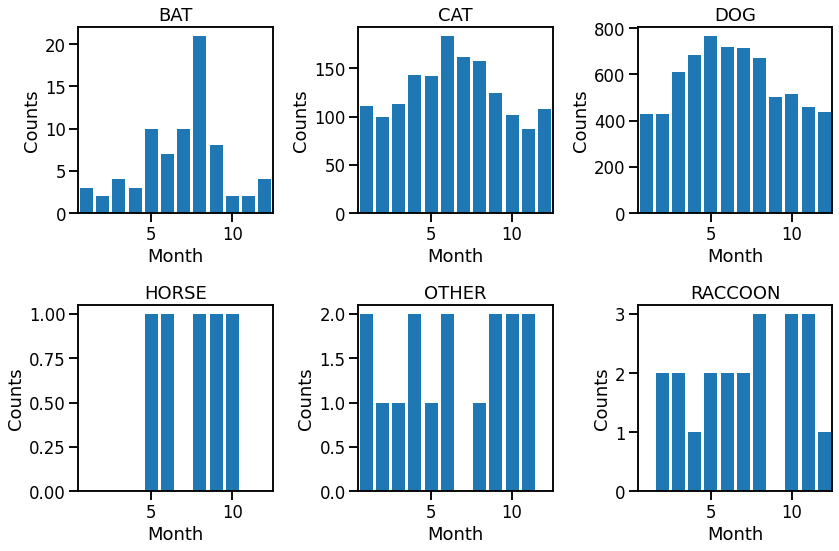

In [14]:
x = range(1,13)
titles = df_animal_bite_month_long.index 
fig, axes = plt.subplots(2,3, figsize = (12,8)) 
axes = axes.ravel()
for title, ax, idx in zip(titles, axes, df_animal_bite_month_long.index):
    ax.bar(x, df_animal_bite_month_long.loc[idx])
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Counts')
    ax.set_xlim((0.5,12.5))
plt.tight_layout()

In Summer, animal bite occurs most frequently. For instance, Bat in August, Cat in June, and Dog in May tends to attack. Therefore, be careful in summer or high humidity weather.

## Animal's gender more likely to bite

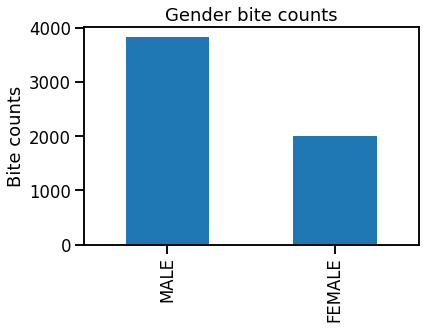

In [15]:
df.replace({'GenderIDDesc':'UNKNOWN'},np.nan, inplace = True)
df['GenderIDDesc'].value_counts().plot(kind = 'bar')
plt.ylabel('Bite counts')
plt.title('Gender bite counts');
# df['GenderIDDesc'].replace('UNKNOWN',np.nan, inplace = True)

## Animals most likely to bite

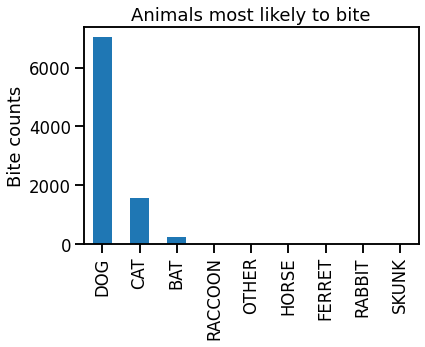

In [16]:
df['SpeciesIDDesc'].value_counts().plot(kind = 'bar')
plt.ylabel('Bite counts')
plt.title('Animals most likely to bite');

In [17]:
Species_df = pd.DataFrame(df['SpeciesIDDesc'].value_counts()).rename(columns = {'SpeciesIDDesc': 'TotalNumber'})

## Dog breeds most likely to bite

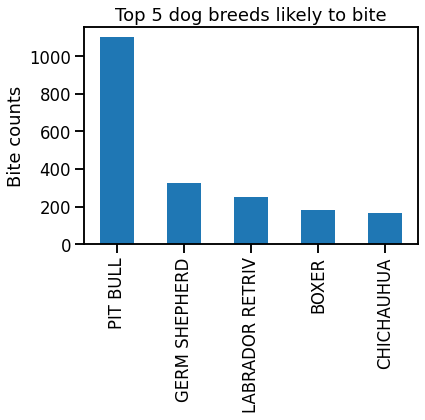

In [18]:
df.loc[df['SpeciesIDDesc'] == 'DOG','BreedIDDesc'].value_counts().head(5).plot(kind = 'bar')
plt.ylabel('Bite counts')
plt.title('Top 5 dog breeds likely to bite');

In [19]:
Image(url = 'https://i.ibb.co/DthwQrn/pit.jpg', width = 500)

In [20]:
df['WhereBittenIDDesc'].replace('UNKNOWN',np.nan, inplace = True)
df['WhereBittenIDDesc'].value_counts()

BODY    6213
HEAD    1243
Name: WhereBittenIDDesc, dtype: int64

In [21]:
df['ResultsIDDesc'].replace('UNKNOWN',np.nan, inplace = True)
print(df['ResultsIDDesc'].value_counts())

NEGATIVE    299
POSITIVE      4
Name: ResultsIDDesc, dtype: int64


## RABID POSITIVE

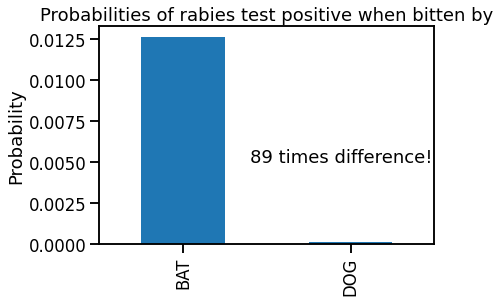

In [22]:
rabies_pos_df = pd.DataFrame(df.loc[df['ResultsIDDesc'] == 'POSITIVE','SpeciesIDDesc'].value_counts())
rabies_pos_df = rabies_pos_df.merge(Species_df, how = 'left',left_index = True, right_index = True)
rabies_pos_df['Prob_rabies_postive'] = rabies_pos_df['SpeciesIDDesc'] / rabies_pos_df['TotalNumber']
rabies_pos_df['Prob_rabies_postive'].plot(kind = 'bar')
chance = round(rabies_pos_df.loc['BAT','Prob_rabies_postive']/ rabies_pos_df.loc['DOG','Prob_rabies_postive'])
plt.ylabel('Probability' )
plt.text( 0.4,0.005, str(chance) +  ' times difference!')
plt.title('Probabilities of rabies test positive when bitten by');

In [23]:
Image(url = "https://scontent-hou1-1.xx.fbcdn.net/v/t1.6435-9/82765238_10157928681875135_1057307797361786880_n.jpg?stp=dst-jpg_s960x960&_nc_cat=104&ccb=1-7&_nc_sid=9267fe&_nc_ohc=mXwy7I9NeB8AX9PIzcq&_nc_ht=scontent-hou1-1.xx&oh=00_AT9ZQfEoxaPTQ3qO1gKX2Y6DVlKOurjXgtJDsU3fhniQsQ&oe=634C3B11", width = 600)

## Animal attached head

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


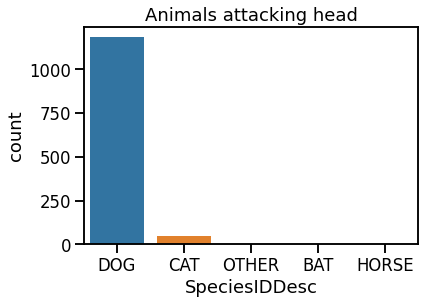

In [24]:
sns.countplot(df.loc[df['WhereBittenIDDesc']=='HEAD','SpeciesIDDesc'])
plt.title('Animals attacking head');

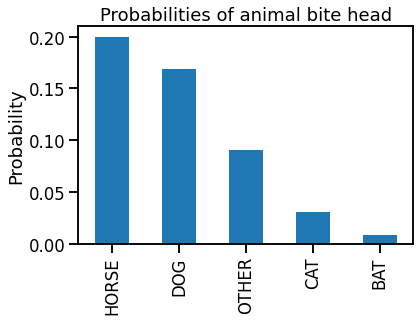

In [25]:
AttackHead_df = pd.DataFrame(df.loc[df['WhereBittenIDDesc']=='HEAD','SpeciesIDDesc'].value_counts()).rename(columns = {'SpeciesIDDesc':'BiteHeadCount'})
AttackHead_df = AttackHead_df.merge(Species_df, how = 'left',left_index = True, right_index = True)
AttackHead_df['Prob_attack_head'] = AttackHead_df['BiteHeadCount'] / AttackHead_df['TotalNumber']
AttackHead_df['Prob_attack_head'].sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Probability')
plt.title('Probabilities of animal bite head');

Tendency of biting head is correlated to animal's height

# Summary

* There are zip code with high probabilites of being bitten. These zip codes are located relatively far from downtown.
* Animal tends to bite in high-temperature or high-humidity weather. For instance in August, June, and May, bites by Bats, Cats, and dogs occurs most frequently.
* DOG bite occurs most, and Pit bull is the species bite most
* Get a test ASAP to stop rabies when bitten by a bat. 90 times higher chance to test positive
* The probability of attacking head is correlated to animal's size or height.